### WEEK 5: FRIDAY LAB 04

Assignment: The various types of regression we have looked at in this module are everyday methods in a Data Analyst's toolkit. This week, you will determine which of the variables in your team dataset depend on other variables; that is, which independent variables can be used to predict values for the dependent variable most effectively.

Complete the analyses below in a .ipynb file and answer the following questions in markdown (.ipnyb) (1 point each):
1. Select one dependent variable in the dataset. This will be your target variable for the remainder of this lab. Explain how and why you have selected that particular target variable in no less than 3 sentences.

2. Determine what correlations there are among independent variables (= predictors) in the dataset by setting up a correlation table.  Explain in at least 2 sentences what correlations your analysis is showing and if any predictor variables appear to be correlated to one another

3. Determine which independent variable in the dataset is the most important overall predictor for your chosen dependent (target) variable, then build a simple linear regression based on this predictor and evaluate the quality of your model. Explain why (or why not) it is acceptable to use this model to predict future values of your dependent variable.

4. Run a basic multiple regression and review the p-values for each variable. If any variables have p-values > 0.05, remove them because they are not statistically significant. Rerun the multiple regression until you can see which of the variables in your dataset should be combined to produce an optimal model. Then build and run your multiple regression model and test its quality. Explain how this model improves the output of the simple linear regression you ran previously.

5. Transform your dependent variable from question 1 into a binary shape. Build and run a logistic regression model and explain in AT LEAST two sentences how your output improves on the simple and multiple regression. Is the logistic model better or not as good?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Reading in the Bank Marketing dataset. ,
bank = pd.read_csv('https://raw.githubusercontent.com/mdfarhankhan196/Mohammed__IT533/master/data/bank-full.csv', sep=';')
#Verifying that we can see the data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

1. Select one dependent variable in the dataset. This will be your target variable for the remainder of this lab. Explain how and why you have selected that particular target variable in no less than 3 sentences.


The selected dependant variable is y in the dataset. The variable y shows wheather a client will subscribe a term deposit or not. The prediction of y will help identify clients who are likely to subscribe to a term deposit.

2. Determine what correlations there are among independent variables (= predictors) in the dataset by setting up a correlation table.  Explain in at least 2 sentences what correlations your analysis is showing and if any predictor variables appear to be correlated to one another

In [5]:
corr = bank.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


The previous and the pdays have the best positive correlation in the correlation table of predictors. Day and pdays have the best negative correlation in the correlation table.

3. Determine which independent variable in the dataset is the most important overall predictor for your chosen dependent (target) variable, then build a simple linear regression based on this predictor and evaluate the quality of your model. Explain why (or why not) it is acceptable to use this model to predict future values of your dependent variable.

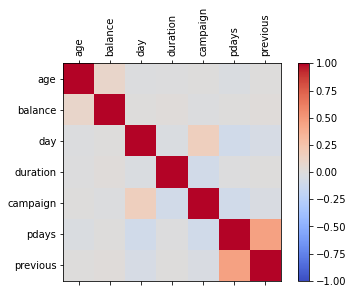

In [6]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

The most important predictor would be the pdays refering to the number of days that passed by after the client was last contacted from a previous campaign. This is also because more than one contact to the client was required

In [12]:
bank['y'] = pd.factorize(bank['y'])[0]
X = bank['pdays']
y = bank['y']
X = sm.add_constant(X)
bank.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
bank.mod1_summary = bank.mod1.summary()
print(bank.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     490.7
Date:                Fri, 11 Feb 2022   Prob (F-statistic):          3.79e-108
Time:                        11:53:20   Log-Likelihood:                -12590.
No. Observations:               45211   AIC:                         2.518e+04
Df Residuals:                   45209   BIC:                         2.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1036      0.002     63.956      0.0

The P value is 0  showing the variables are dependant. The Model is not acceptable to build prediction models as the R squared accuracy is at 1%. 

4. Run a basic multiple regression and review the p-values for each variable. If any variables have p-values > 0.05, remove them because they are not statistically significant. Rerun the multiple regression until you can see which of the variables in your dataset should be combined to produce an optimal model. Then build and run your multiple regression model and test its quality. Explain how this model improves the output of the simple linear regression you ran previously.

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 4.1+ MB


In [16]:
# storing only the factor levels array inplace of the object utilizing pandas factorize to utilize all the dataset variables 

bank['job'] = pd.factorize(bank['job'])[0]
bank['marital'] = pd.factorize(bank['marital'])[0]
bank['education'] = pd.factorize(bank['education'])[0]
bank['default'] = pd.factorize(bank['default'])[0]
bank['housing'] = pd.factorize(bank['housing'])[0]
bank['loan'] = pd.factorize(bank['loan'])[0]
bank['contact'] = pd.factorize(bank['contact'])[0]
bank['month'] = pd.factorize(bank['month'])[0]
bank['poutcome'] = pd.factorize(bank['poutcome'])[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [18]:
# multiple regression
X = bank.iloc[:, :-1].values
y = bank.iloc[:, 16].values

X = np.append(arr = np.ones((45211, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]] # Now we combine all 16 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     977.0
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:03:58   Log-Likelihood:                -6119.4
No. Observations:               45211   AIC:                         1.227e+04
Df Residuals:                   45194   BIC:                         1.242e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0880      0.007    -13.291      0.0

In [19]:
# Removing where p-values > 0.05
X_opt = X[:, [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]] # variables having p-values > 0.05 have been removed
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     1202.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:06:26   Log-Likelihood:                -6121.9
No. Observations:               45211   AIC:                         1.227e+04
Df Residuals:                   45197   BIC:                         1.239e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0896      0.004    -23.104      0.0

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0) 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Model accuracy score:', round(regressor.score(X_train,y_train)*100,2))

Model accuracy score: 25.87


The accuracy score improved from 1% to 25.87% with using mutiple regression. This improves the quality of the simple linear regression by improving the accuracy score

5. Transform your dependent variable from question 1 into a binary shape. Build and run a logistic regression model and explain in AT LEAST two sentences how your output improves on the simple and multiple regression. Is the logistic model better or not as good?

In [22]:
# The Dependant variable is already in a binary shape
# Logistic regression Model.

# Training and Test set
dfTrain = bank[:42000]
dfTest = bank[42000:45000]
dfCheck = bank[45000:]

# Conversion to NumPy arrays
train_y = np.asarray(dfTrain['y']) # We store target in train_y, but as numpy array
train_x = np.asarray(dfTrain.drop('y',1)) # We remove target from the predictors (because it's the output variable)
test_y = np.asarray(dfTest['y']) # See the comments above
test_x = np.asarray(dfTest.drop('y',1))

# input normalization.
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
 
train_x = (train_x - means)/std
test_x = (test_x - means)/std

# Building the Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)

# Testing the Model
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  55.900000000000006 %


Compared to linear regression Logistic regression is much better. The model accuracy compared to multiple linear regression hass improved drastically from 25.87% to 55.900000000000006 %.